<font color='blue'> First of all, please “Copy to Drive” to get your own copy for editing. </font>

<font color='red'> Run all the cells. For places with "Complete the codes below", please replace the "XXX" placeholder with your own codes.</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import torchvision
%matplotlib inline

In [2]:
# from bokeh.plotting import figure, show

# Intro to matplotlib

**`matplotlib`** is a desktop plotting package designed for creating plots and figures suitable for publication.

To output plots in the Jupyter notebook, use the following magic command:

In [3]:
# The line %matplotlib inline is not actually Python code,
# but rather a magic command specific to Jupyter Notebooks and IPython environments.
# It's used to display Matplotlib plots inline within the notebook itself, rather than in a separate window or file.

#display within the notebook itself, rather than in a separate window or file
%matplotlib inline


In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

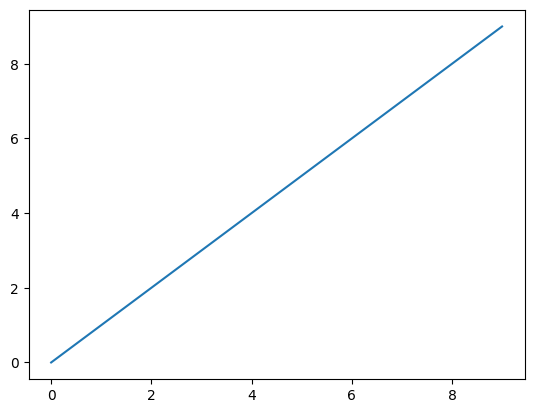

In [5]:
plt.plot(data)

### Figures and subplots

Plots in matplotlib reside within a `Figure` object. You can create a new figure with **`plt.figure()`**. You can’t make a plot with a blank figure. You have to create one or more `subplots` using **`add_subplot()`**:

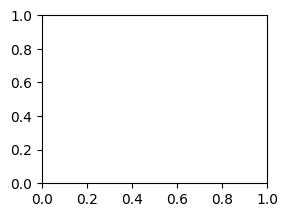

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) # figure should be 2x2 and we are selecting the first of four subplots.

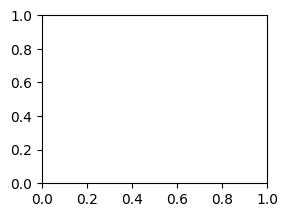

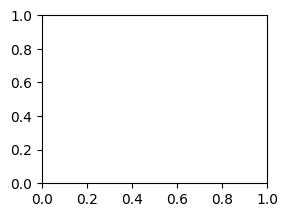

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) # figure should be 2x2 and we are selecting the first of four subplots.
fig

If you create the next two subplots, you’ll end up with a visualization that looks like an empty matplotlib figure with three subplots:

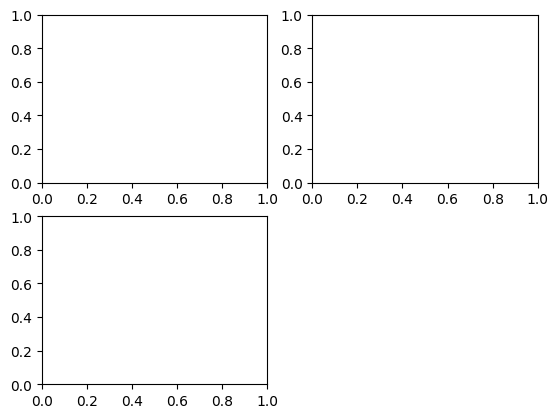

In [8]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
fig

Put them all together (in Jupyter notebooks, plots are reset after each cell is evaluated).

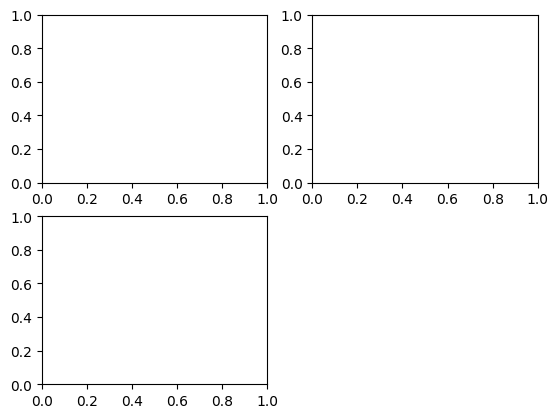

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

We could make a line plot with the **`plot()`** method:

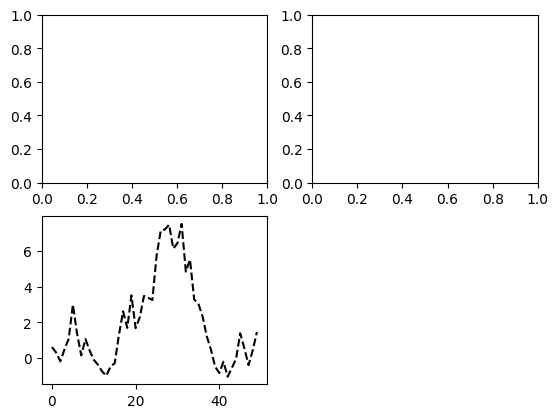

In [10]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",linestyle="dashed")
fig

You can directly plot on the other empty subplots by calling each one’s instance method:

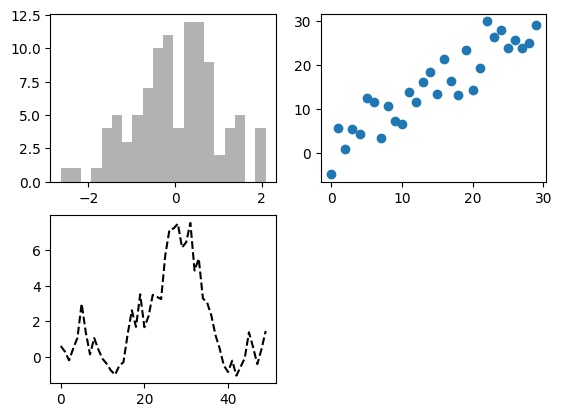

In [11]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
fig

You can indicate that subplots should have the same x- or y-axis using **`sharex`** and **`sharey`**, respectively. You can change the spacing using the **`subplots_adjust()`** method on Figure objects where **`wspace`** and **`hspace`** control the percent of the figure width and figure height, respectively, to use as spacing between subplots.

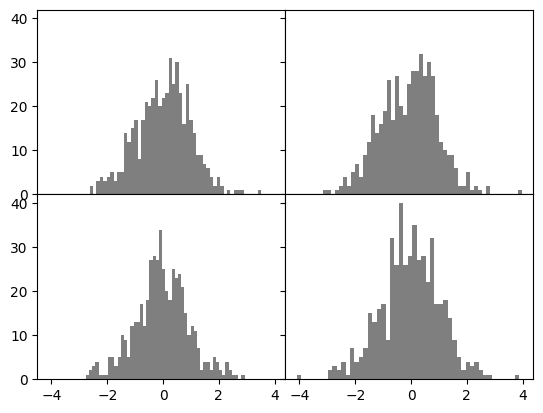

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

**Example for MNIST data**:

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:01<00:00, 4.98MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 145kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.20MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.79MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



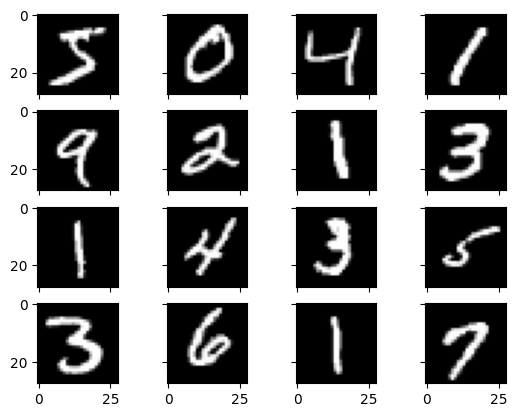

In [13]:
# load dataset from torchvision
train = torchvision.datasets.MNIST('data', train=True, download=True)

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(train.data[4*i+j], cmap="gray")
plt.show()

Training data has  18623 images
Each image is of size  28 x 28


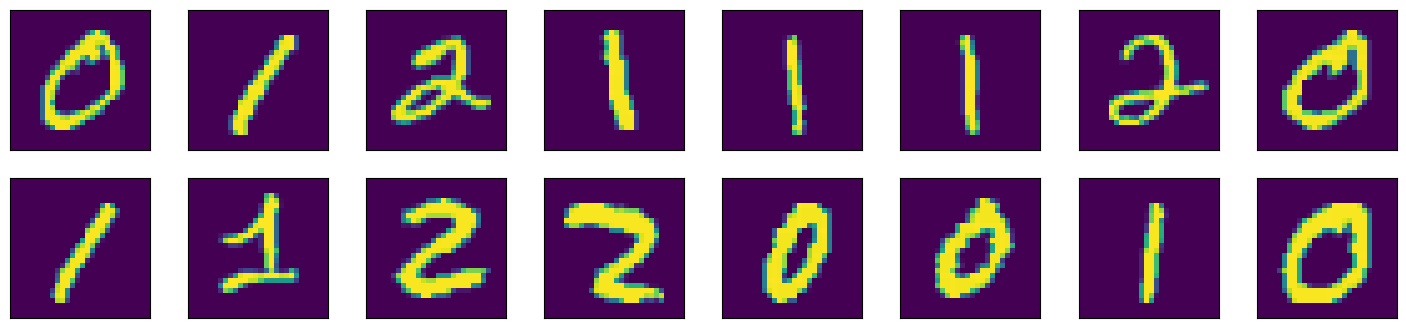

In [14]:
# Load MNIST data
# train = torchvision.datasets.MNIST('data', train=True, download=True)

# each sample becomes a vector of values 0-1
x_train = train.data
train_labels = train.targets

# Choose only the digits 0, 1, 2
total_classes = 3
ind = np.where(train_labels < total_classes)
x_train, train_labels = x_train[ind], train_labels[ind]
# Shape of training data
total_examples, img_length, img_width = x_train.shape
# Print the statistics
print('Training data has ', total_examples, 'images')
print('Each image is of size ', img_length, 'x', img_width)

# Show images
img_per_row = 8
fig,ax = plt.subplots(nrows=2, ncols=img_per_row,
                      figsize=(18,4),
                      subplot_kw=dict(xticks=[], yticks=[]))
for row in [0, 1]:
    for col in range(img_per_row):
        ax[row, col].imshow(x_train[row*img_per_row + col])
plt.show()

### Colors, markers, and line styles

matplotlib’s line **`plot()`** function accepts arrays of x and y coordinates and optional color styling options. For example, to plot x versus y with green dashes:

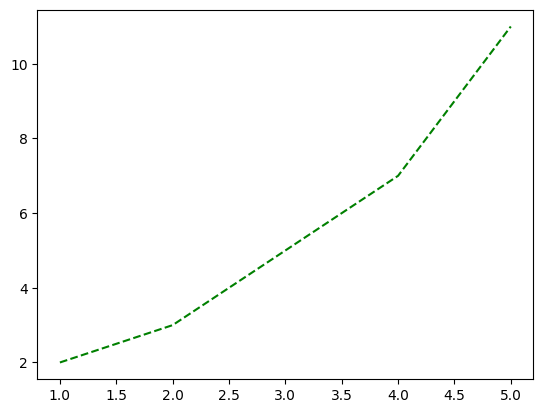

In [15]:
# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a figure and axis objects
fig, ax = plt.subplots()
ax.plot(x, y, linestyle='--', color='green', label='Line Plot')

Line plots can additionally have markers to highlight the actual data points:

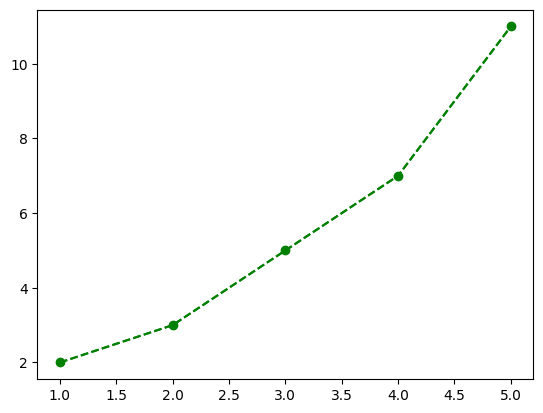

In [16]:
ax.plot(x, y, linestyle='--', color='green', label='Line Plot', marker="o")
fig

Subsequent points are linearly interpolated by default. This can be altered with the **`drawstyle`** option

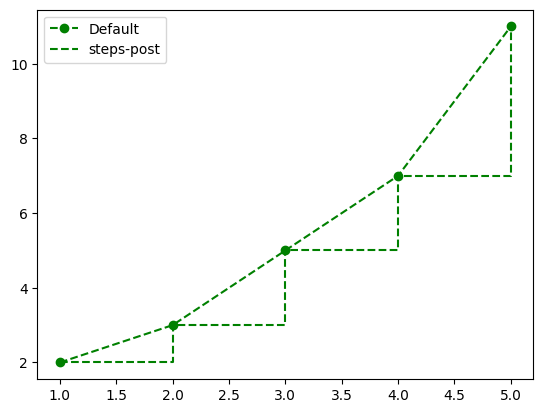

In [17]:
fig, ax = plt.subplots()
ax.plot(x,y, color="green", linestyle="dashed", label="Default",marker="o")
ax.plot(x,y,color="green", linestyle="dashed", drawstyle="steps-post", label="steps-post")
ax.legend();

### Ticks, labels, and legends

Most kinds of plot decorations can be accessed through methods on matplotlib axes objects.To add a legend pass the **`label`** argument when adding each piece of the plot. Once you’ve done this, you can call **`legend()`** to automatically create a legend:

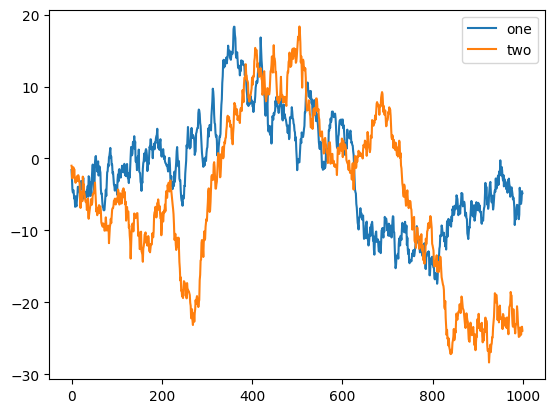

In [18]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum(), label ="one")
ax.plot(np.random.standard_normal(1000).cumsum(), label ="two")
ax.legend();

To change the x-axis ticks, we can use **`set_xticks()`** which instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. We can set any other values as the labels using **`set_xticklabels()`**.The method **`set_xlabel()`** gives a name to the x-axis, and **`set_title()`** is the subplot title.

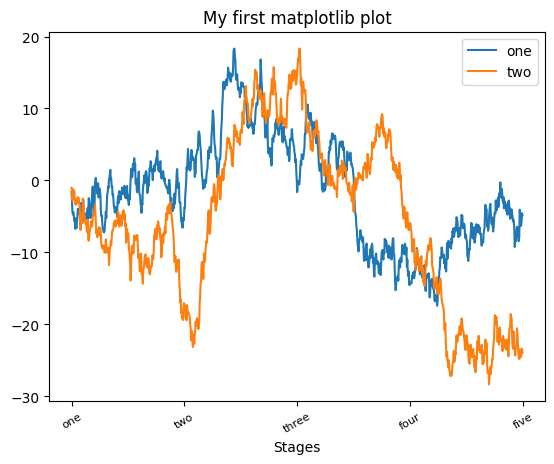

In [19]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")
fig

### Annotations and drawing on a subplot

You can add annotations and text using the **`text()`**, **`arrow()`**, and **`annotate()`** functions.

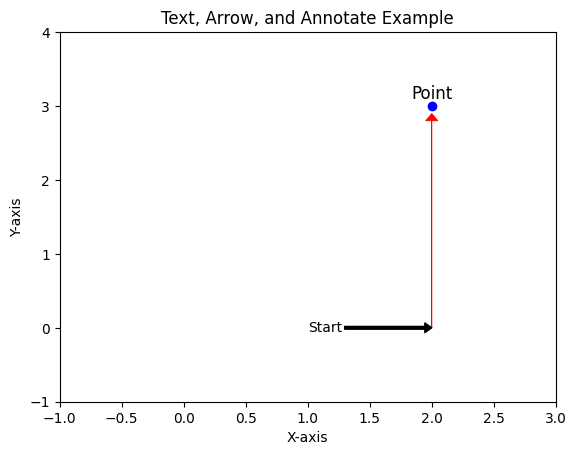

In [20]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot a point
ax.plot(2, 3, 'o', color='blue')

# Add text at specific coordinates
ax.text(2, 3.1, 'Point', fontsize=12, ha='center')

# Add an arrow
ax.arrow(2, 0, 0, 2.8, color='red', linewidth=0.5, head_width=0.1, head_length=0.10)

# Add annotation
ax.annotate('Start', xy=(2, 0), xytext=(1, 0),
            arrowprops=dict(facecolor='black', headwidth=7, width=2,
                            headlength=5),horizontalalignment="left",
                            verticalalignment="center")

# Set limits for the plot
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 4)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Text, Arrow, and Annotate Example')

# Display the plot
plt.show()

To add a shape to a plot, you create the patch object and add it to a subplot ax by passing the patch to **`ax.add_patch()`**:

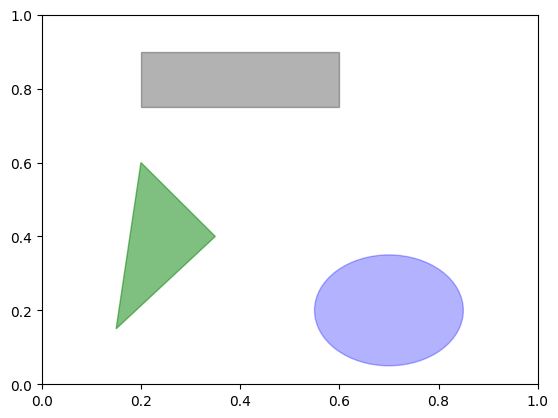

In [21]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3) # alpha sets the transparency of the overlaid plot.
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon);

<font color='red'>Complete the codes in the cell below. Please replace the "XXX" placeholder with your own codes. </font>

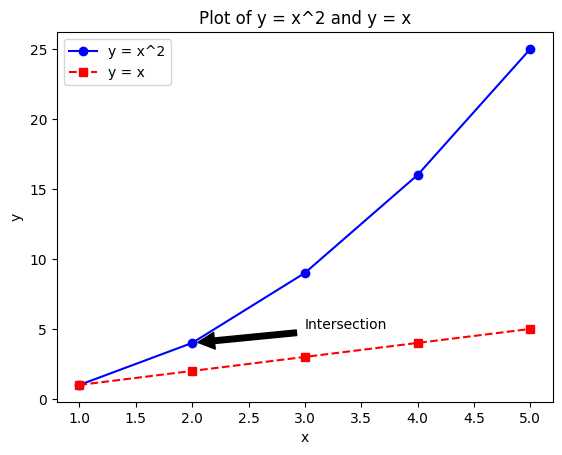

In [23]:
# Data for plotting
x = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]  # Data for y = x^2
y2 = [1, 2, 3, 4, 5]     # Data for y = x

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot y = x^2 on the first axis (ax1): define color, marker, linestyle, and label.
ax1.plot(x, y1, color='blue', marker='o', linestyle='-', label='y = x^2')

ax1.set_title('Plot of y = x^2 and y = x')  # Set title for the subplot
ax1.set_xlabel('x')    # Set label for x-axis
ax1.set_ylabel('y')    # Set label for y-axis

# Plot y = x on the same axis (ax1): define color, marker, linestyle, and label.
ax1.plot(x, y2, color='red', marker='s', linestyle='--', label='y = x')

# Add a legend to distinguish between the two lines
ax1.legend()

# Annotate a common point on the plot
ax1.annotate('Intersection', xy=(2, 4), xytext=(3, 5),
            arrowprops=dict(facecolor='black', shrink=0.05));


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Plotting with pandas plot()

* Pandas is mainly a data analysis tool, but it also provides multiple options for visualization.
* Pandas objects come equipped with their plotting functions. These plotting functions are **essentially wrappers around the `matplotlib` library**.
* Think of **matplotlib as a backend for pandas plots**.

<font color='red'> Please download "mortality_prepped.pkl" and "mortality_wide.pkl" files on canvas and store them in your working folder.

In [26]:
## Connect Google Drive folders to a Google Colab Notebook

from google.colab import drive

drive.mount('/content/drive')

%cd drive/MyDrive/Data
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data


In [28]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


<Axes: xlabel='Year', ylabel='DeathRate'>

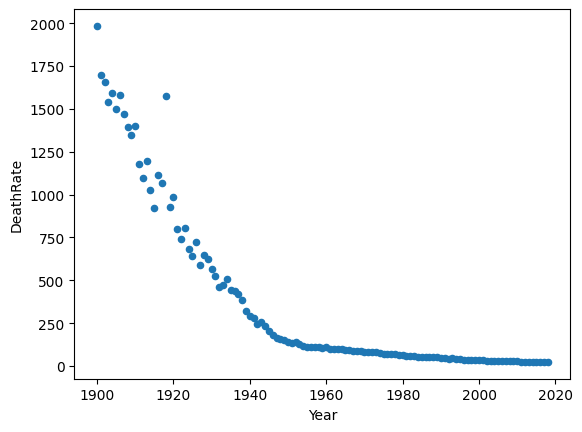

In [29]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

In [30]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


### Line and scatter plots

<Axes: xlabel='Year'>

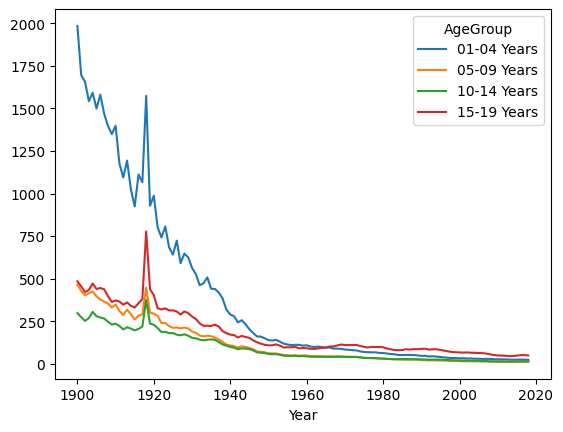

In [31]:
mortality_wide.plot()

<Axes: xlabel='Year'>

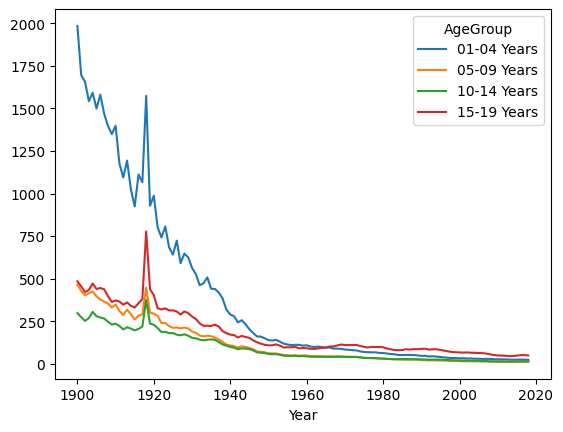

In [32]:
# line plot
mortality_wide.plot.line()

<Axes: xlabel='Year'>

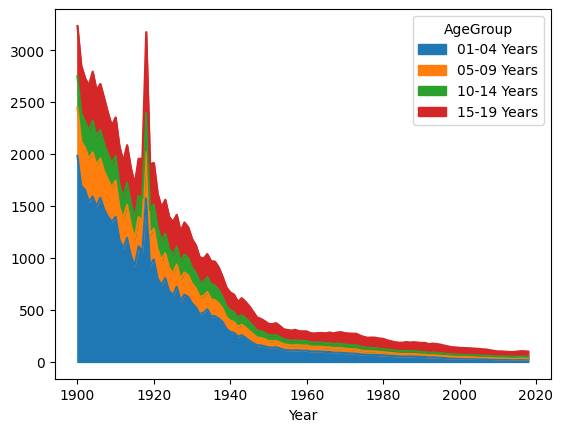

In [33]:
# area plot
mortality_wide.plot.area()

<Axes: xlabel='Year', ylabel='DeathRate'>

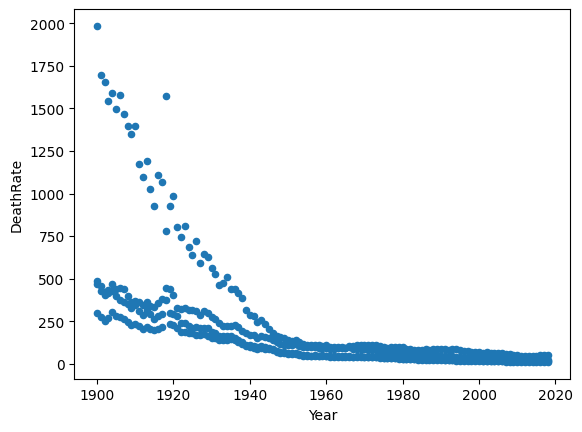

In [34]:
# scatter plot
mortality_data.plot.scatter(x='Year', y='DeathRate')

### Bar plots

<Axes: xlabel='Year'>

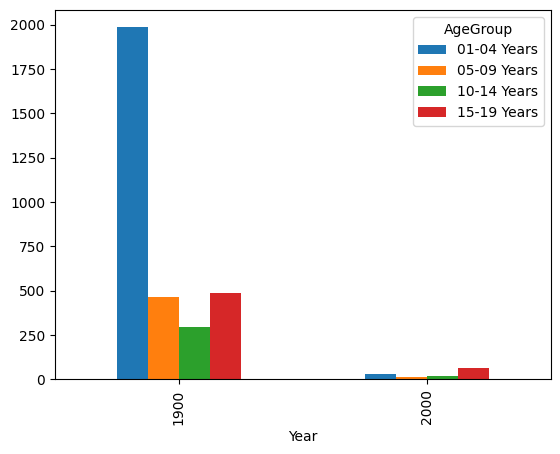

In [35]:
# bar plot -vertical
mortality_wide.query('Year in (1900,2000)').plot.bar()

<Axes: ylabel='Year'>

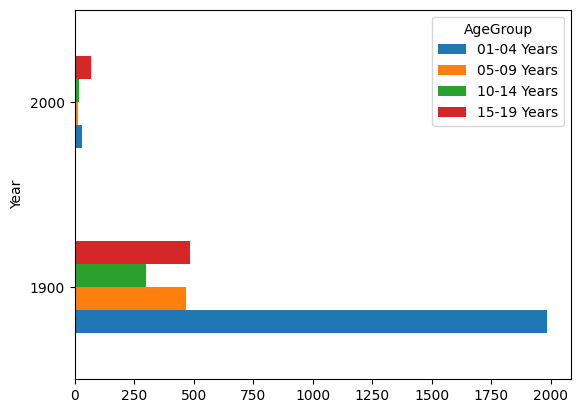

In [36]:
# bar plot -horizontal
mortality_wide.query('Year in (1900,2000)').plot.barh()

### Histogram and density plots

<Axes: ylabel='Frequency'>

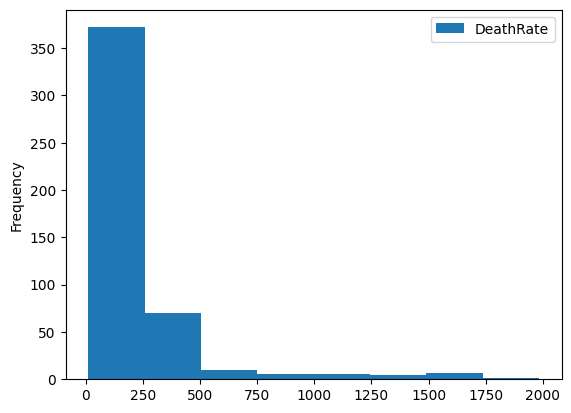

In [37]:
# histogram plot
mortality_data.plot.hist(y='DeathRate',bins=8)

<Axes: ylabel='Density'>

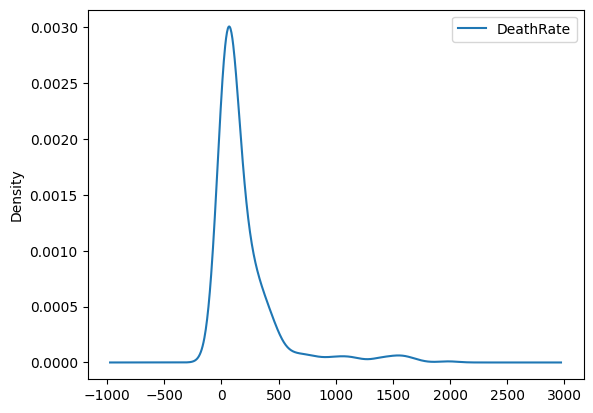

In [38]:
# density plot
mortality_data.plot.density(y='DeathRate')

<Axes: ylabel='Density'>

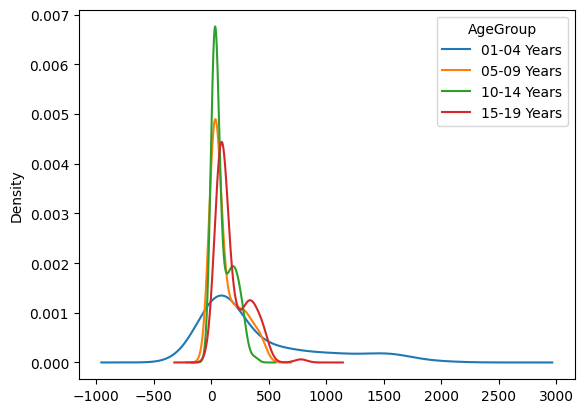

In [39]:
# density plot
mortality_wide.plot.density()

### Box and pie plots

<Axes: >

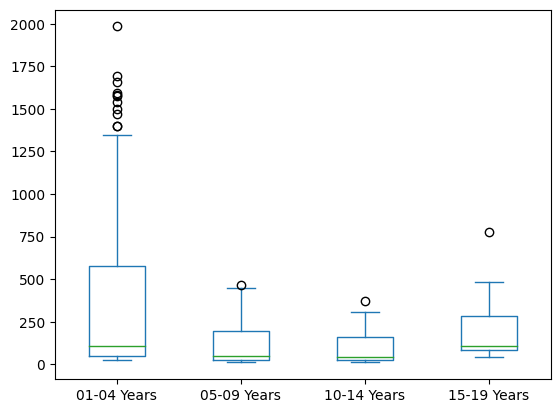

In [40]:
# box plot
mortality_wide.plot.box()

<Axes: ylabel='DeathRate'>

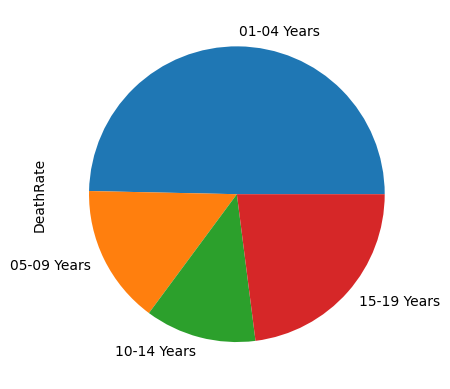

In [41]:
# pie plot
mortality_data.groupby('AgeGroup')['DeathRate'].sum().plot.pie()

### Chaining

<Axes: ylabel='AgeGroup'>

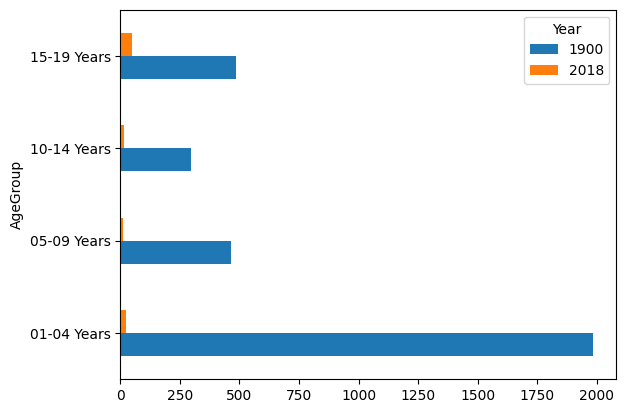

In [42]:
# chaining
mortality_data.query('Year in (1900,2018)') \
     .pivot(index='AgeGroup', columns='Year', values='DeathRate') \
     .plot.barh()

<Axes: xlabel='Year', ylabel='Deaths per 100,000'>

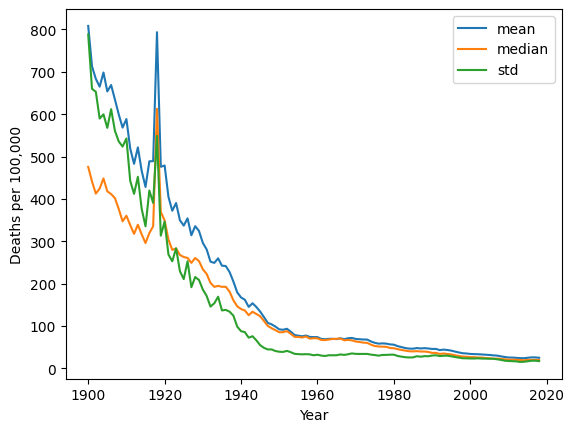

In [43]:
# chaining
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std']).plot(ylabel='Deaths per 100,000')

# Plotting with seaborn
* Pandas plot() method is okay for creating quick plots.
* Seaborn not only makes it easier to prepare a wider variety of plots,
* but it also lets you enhandce those plots so they're suitable for presentation.

**`matplotlib`** can be a fairly low-level tool. In pandas, we may have multiple columns of data, along with row and column labels. Another library is **`seaborn`**, a high-level statistical graphics library built on matplotlib. **`seaborn`** simplifies creating many common visualization types. With data that requires aggregation or summarization before making a plot, using the **`seaborn`** package can make things much simpler.

**Types of plot**:
* the relational plot: https://seaborn.pydata.org/generated/seaborn.relplot.html
* the categorical plot: https://seaborn.pydata.org/generated/seaborn.catplot.html
* the distribution plot: https://seaborn.pydata.org/generated/seaborn.displot.html

In [44]:
import seaborn as sns

In [45]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


### General vs. specific

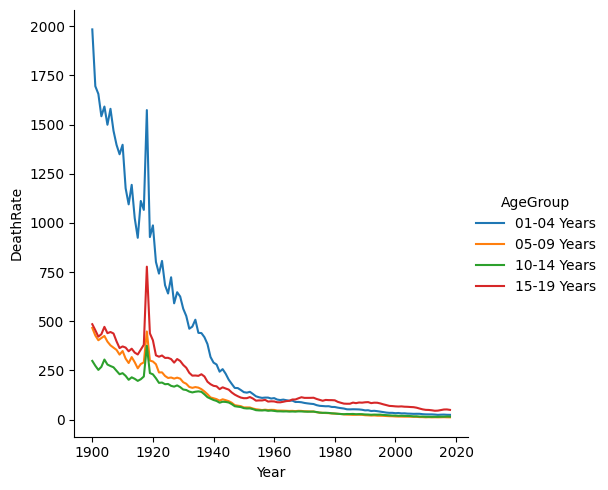

In [46]:
# The general method: the kind parameter is required
# relational plots: https://seaborn.pydata.org/generated/seaborn.relplot.html
sns.relplot(data=mortality_data, kind='line',
            x='Year', y='DeathRate', hue='AgeGroup')

 The **`hue`** option enables us to split by an additional categorical value

<Axes: xlabel='Year', ylabel='DeathRate'>

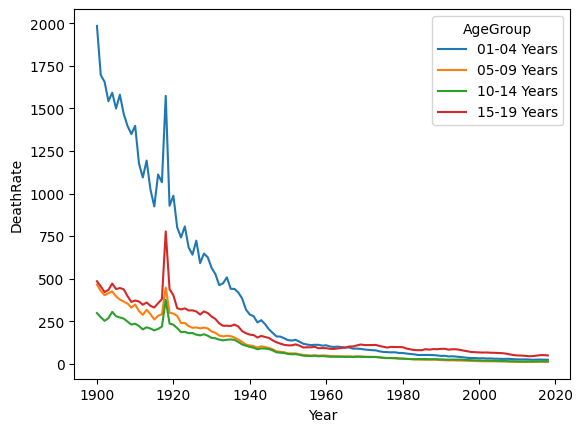

In [47]:
# The specific method: the kind parameter isn't required
## the general methods let you create plots that contain subplots, but the specific methods don't.
sns.lineplot(data=mortality_data,
             x='Year', y='DeathRate', hue='AgeGroup')

### Basic parameters

You can switch between different plot appearances:

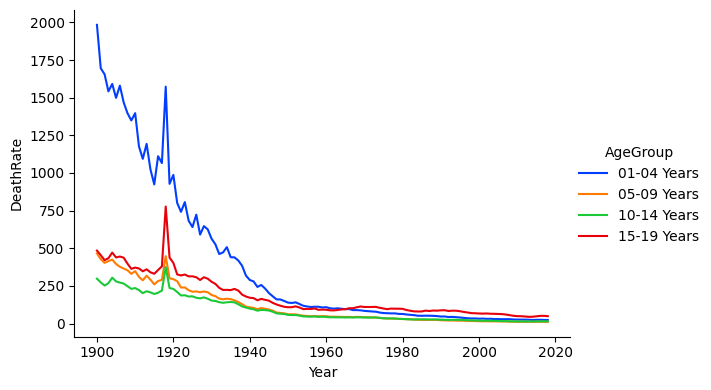

In [48]:
sns.relplot(data=mortality_data, kind='line',
            x='Year', y='DeathRate', hue='AgeGroup', palette='bright',
            height=4, aspect=1.5)

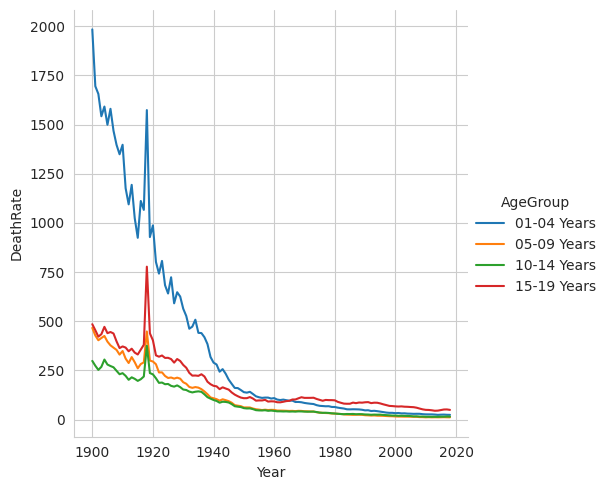

In [49]:
sns.set_style("whitegrid")
# sns.set_palette("Greys_r")
sns.relplot(data=mortality_data, kind='line',
            x='Year', y='DeathRate', hue='AgeGroup');

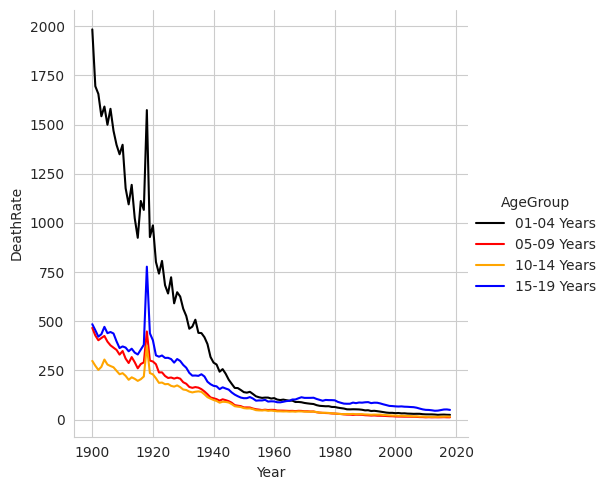

In [50]:
# set color palette
colors = ['black','red','orange','blue']
sns.set_palette(sns.color_palette(colors))  # set color palette
sns.relplot(data=mortality_data, kind='line',
            x='Year', y='DeathRate', hue='AgeGroup')

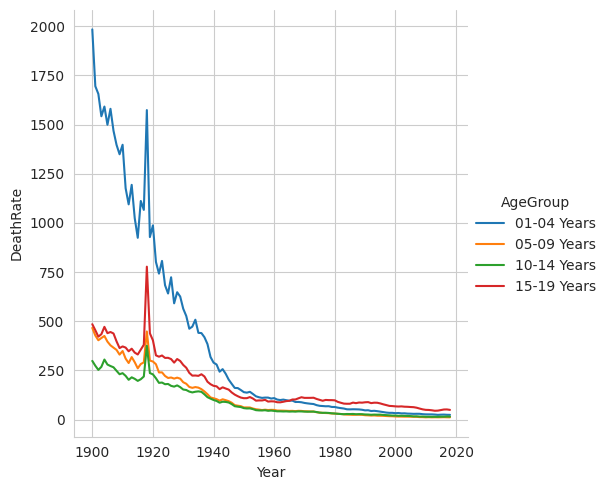

In [51]:
# set colar palette
sns.set_palette(sns.color_palette('tab10'))
sns.relplot(data=mortality_data, kind='line',
            x='Year', y='DeathRate', hue='AgeGroup')

### Line and scatter plots

We can then use seaborn's **`regplot()`** method, which makes a line plot or a scatter plot

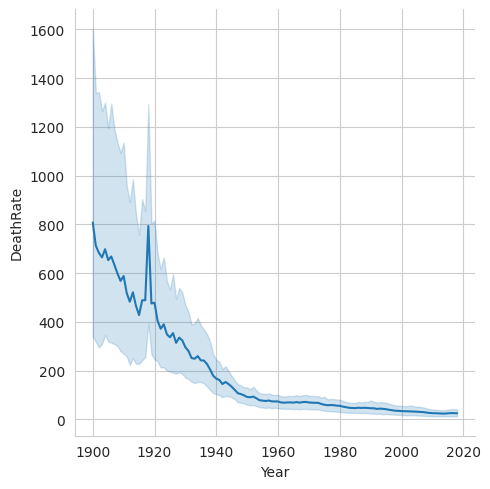

In [52]:
sns.relplot(data=mortality_data, kind='line', x='Year', y='DeathRate')

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series.

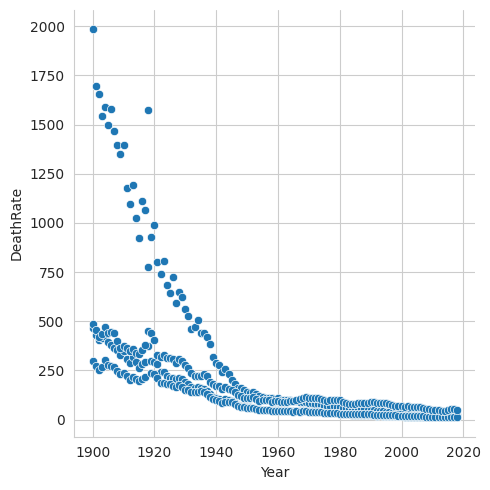

In [53]:
sns.relplot(data=mortality_data, kind='scatter', x='Year', y='DeathRate')

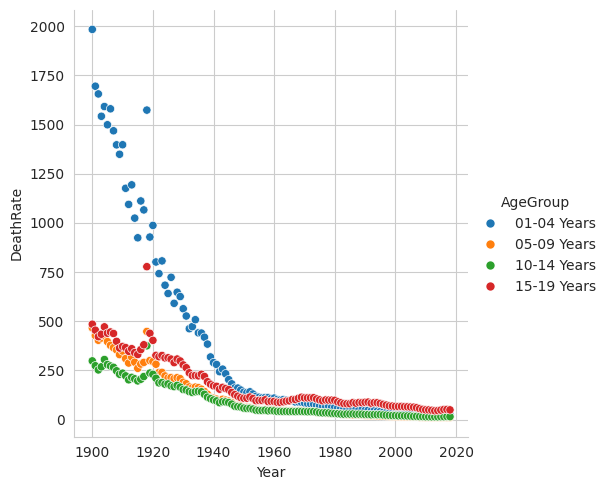

In [54]:
sns.relplot(data=mortality_data, kind='scatter', x='Year', y='DeathRate',
            hue='AgeGroup')

The **size** and **sizes** parameters for a scatter plot:

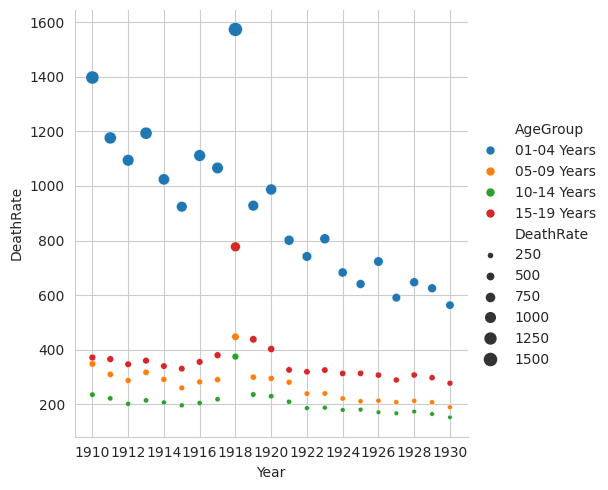

In [55]:
g = sns.relplot(data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='scatter', x='Year', y='DeathRate', hue='AgeGroup',
    size='DeathRate', sizes=(10,100))
for ax in g.axes.flat:
    ax.set(xticks=[x for x in range(1910,1931,2)])

**`seaborn`** has a convenient **`pairplot()`** function that supports placing histograms or density estimates of each variable along the diagonal:

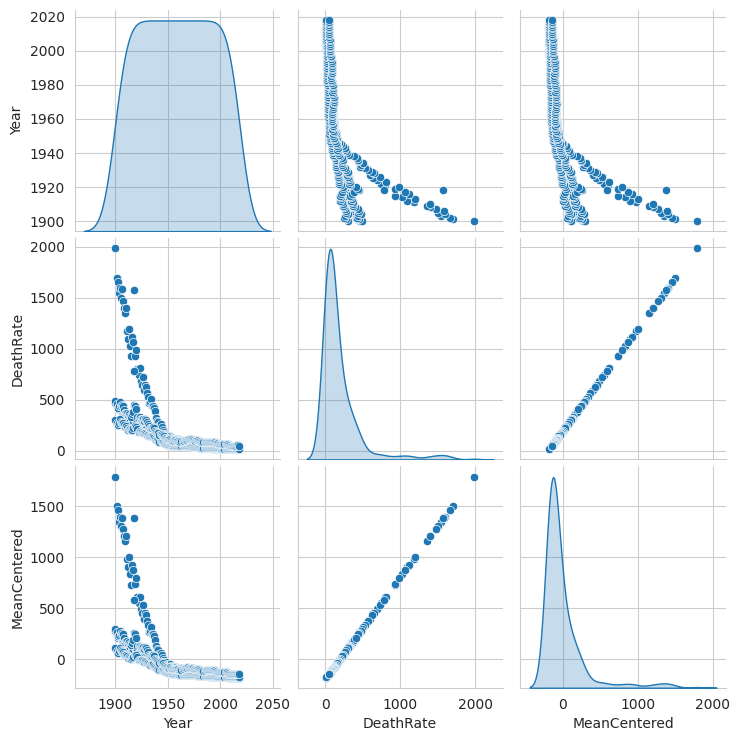

In [56]:
sns.pairplot(data=mortality_data, diag_kind="kde")

### Bar and box plots

One way to visualize data with many categorical variables is to use a facet grid, which is a two-dimensional layout of plots where the data is split across the plots on each axis based on the distinct values of a certain variable. **`seaborn`** has a useful built-in function **`catplot()`** that simplifies making many kinds of faceted plots split by categorical variables

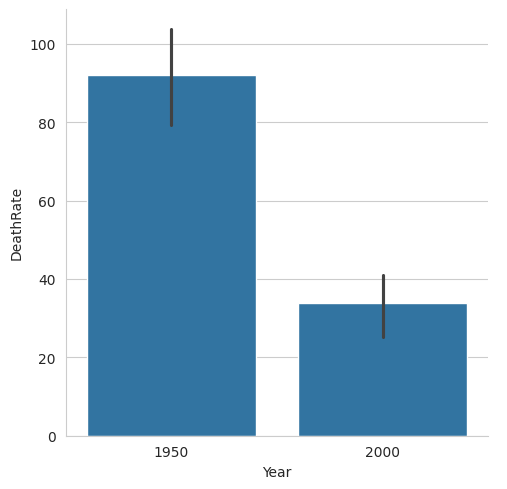

In [57]:
# Categorical plots: https://seaborn.pydata.org/generated/seaborn.catplot.html
sns.catplot(data=mortality_data.query('Year in (1950,2000)'),
            kind='bar', x='Year', y='DeathRate', errorbar=('ci',50))

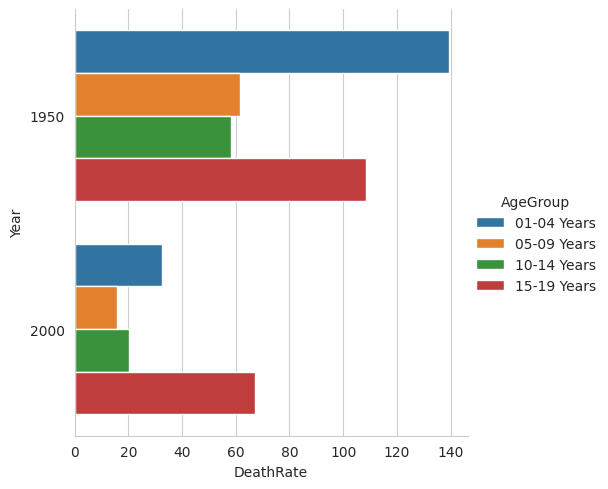

In [58]:
sns.catplot(data=mortality_data.query('Year in (1950,2000)'),
            kind='bar', x='DeathRate', y='Year', hue='AgeGroup', orient='h')

**`catplot`** supports other plot types that may be useful depending on what you are trying to display. For example, box plots (which show the median, quartiles, and outliers) can be an effective visualization type.

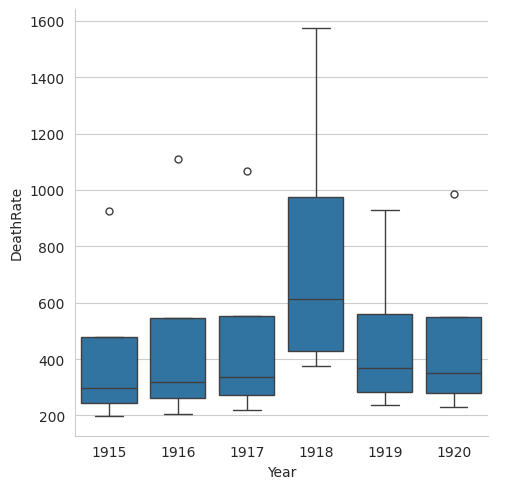

In [59]:
# Box plot
sns.catplot(data=mortality_data.query('Year >= 1915 and Year <= 1920'),
            kind='box', x='Year', y='DeathRate')

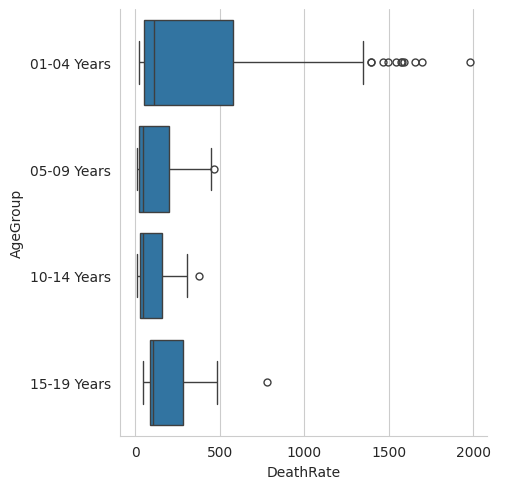

In [60]:
sns.catplot(data=mortality_data,
            kind='box', x='DeathRate', y='AgeGroup', orient='h')

<font color='red'>Complete the codes in the cell below. Please replace the "XXX" placeholder with your own codes, so your output looks like the image below. </font>

In [61]:
# Generating sample data
np.random.seed(42)

years = np.random.choice(['Freshman', 'Sophomore', 'Junior', 'Senior'], size=100)
grades = np.random.randint(0, 101, size=100)
majors = np.random.choice(['Business', 'Health', 'Engineering'], size=100)
passes = np.random.choice(['Yes', 'No'], size=100)

data = {
    'Year': years,
    'Grade': grades,
    'Major': majors,
}

df = pd.DataFrame(data)
df["Pass"] = np.where(df["Grade"]> 60, "Yes", "No")

print(df)

         Year  Grade        Major Pass
0      Junior     62       Health  Yes
1      Senior     17     Business   No
2    Freshman     89       Health  Yes
3      Junior     43     Business   No
4      Junior     33     Business   No
..        ...    ...          ...  ...
95  Sophomore     70     Business  Yes
96  Sophomore     58     Business   No
97     Senior     85       Health  Yes
98  Sophomore     27  Engineering   No
99   Freshman     65  Engineering  Yes

[100 rows x 4 columns]


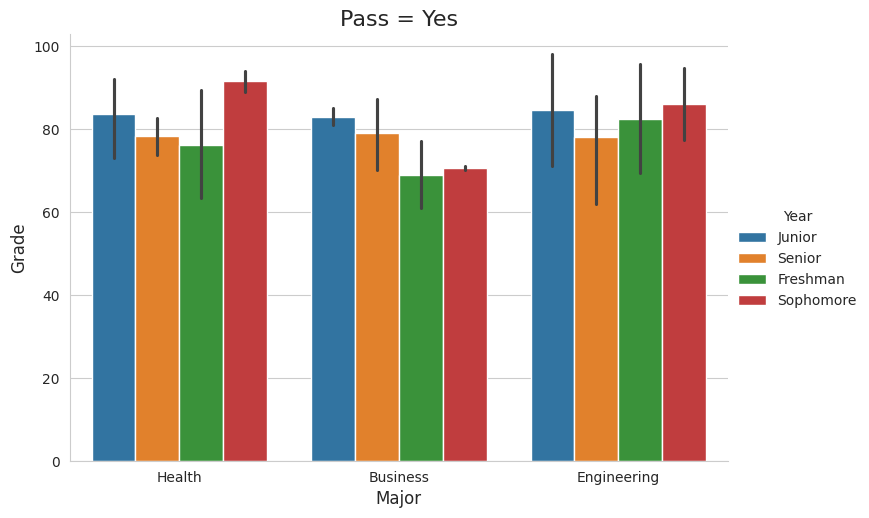

In [84]:
passed_df = df[df["Pass"] == "Yes"]
sns.catplot(x="Major", y="Grade", hue="Year", kind="bar", data=passed_df,
            order=['Health','Business','Engineering'],  # Order of majors
            hue_order=['Junior', 'Senior','Freshman','Sophomore'],  # Order of years
            height=5, aspect=1.5)
plt.title("Pass = Yes", fontsize=16)
plt.xlabel("Major", fontsize=12)
plt.ylabel("Grade", fontsize=12);

Output should look similar to image below the cell:

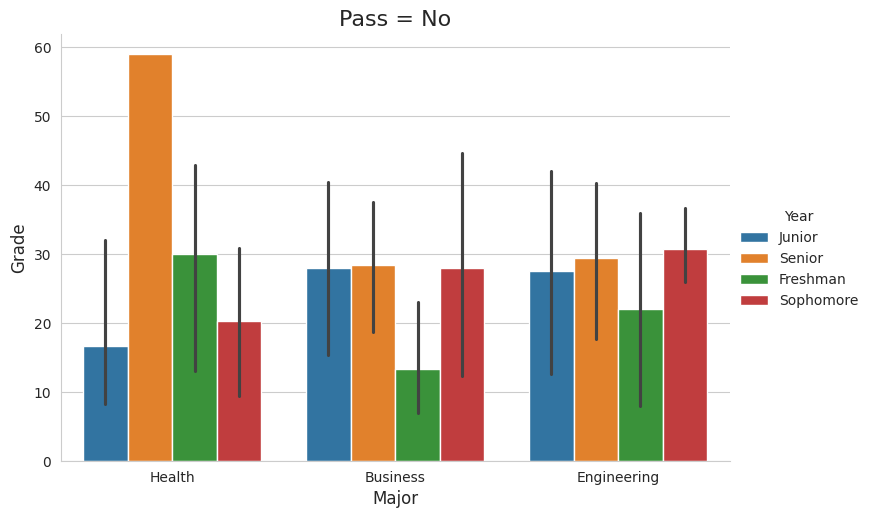

In [85]:
failed_df = df[df["Pass"] == "No"]
sns.catplot(x="Major", y="Grade", hue="Year", kind="bar", data=failed_df,
            order=['Health','Business','Engineering'],  # Order of majors
            hue_order=['Junior', 'Senior','Freshman','Sophomore'],  # Order of years
            height=5, aspect=1.5)
plt.title("Pass = No", fontsize=16)
plt.xlabel("Major", fontsize=12)
plt.ylabel("Grade", fontsize=12);

![](http://drive.google.com/uc?export=view&id=1no8u5EFFB1gWPpO2DGU9OSCXpqbyBgtF)

### Histograms and density plots

`seaborn` makes histograms and density plots easily through its  using the **`histplot()`** method,  which can plot both a histogram and a continuous density estimate simultaneously.

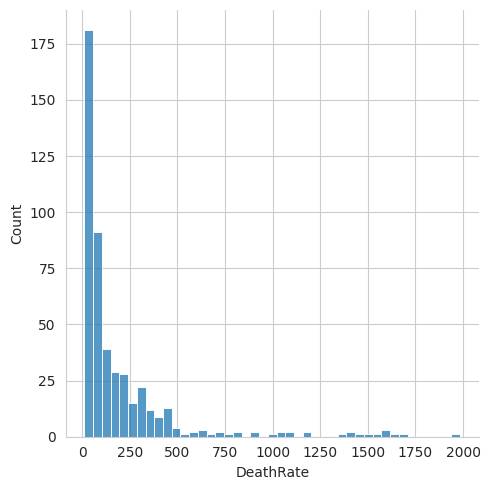

In [86]:
# Distribution plots: https://seaborn.pydata.org/generated/seaborn.displot.html
sns.displot(data=mortality_data, kind='hist', x='DeathRate')

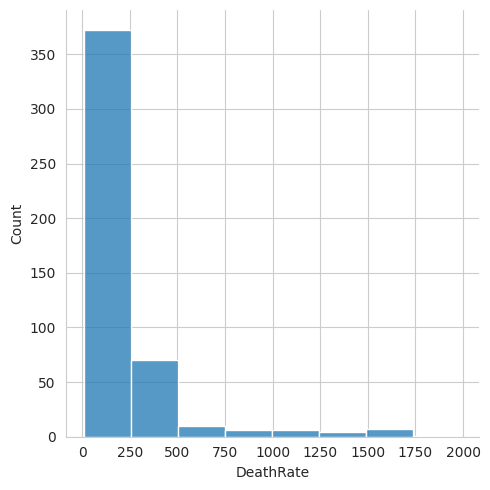

In [87]:
sns.displot(data=mortality_data, kind='hist', x='DeathRate', bins=8)

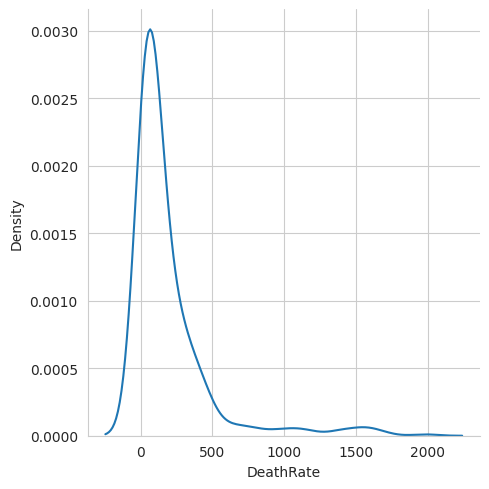

In [88]:
# Kernel Density Estimate (KDE) plot
sns.displot(data=mortality_data, kind='kde', x='DeathRate')

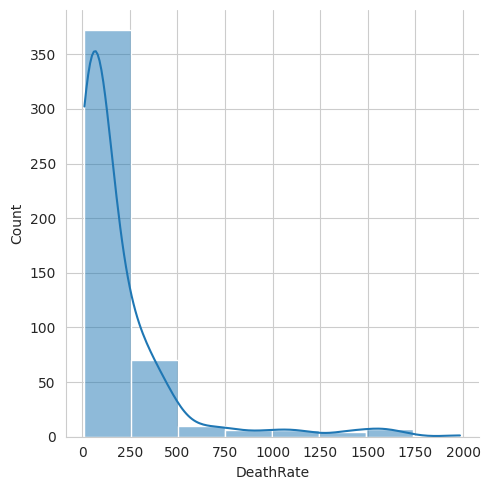

In [89]:
# Enhanced distribution plots
sns.displot(data=mortality_data, kind='hist',
            x='DeathRate', kde=True, bins=8)

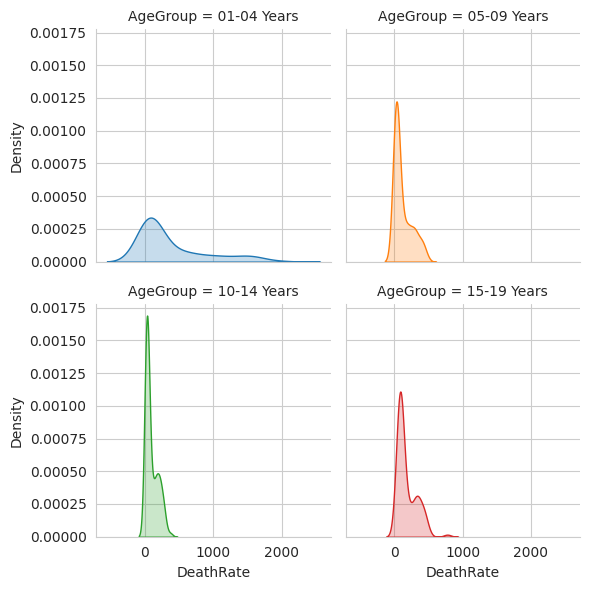

In [90]:
# Enhanced distribution plots
sns.displot(data=mortality_data, kind='kde', x='DeathRate', hue='AgeGroup',
            fill=True, col='AgeGroup', col_wrap=2, height=3, legend=False)

### Enhancing plots: axes method, annotation

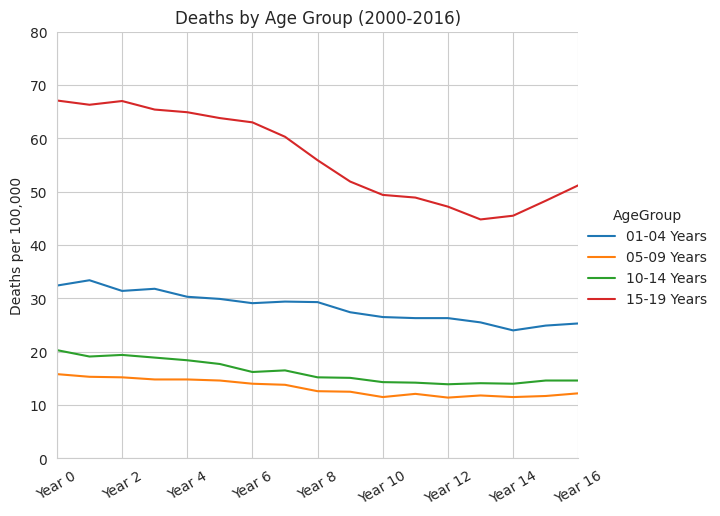

In [91]:
# axes methods for enhancing a plot
g = sns.relplot(
    data=mortality_data,
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', aspect=1.25)
for ax in g.axes.flat:
    ax.set_title('Deaths by Age Group (2000-2016)')
    ax.set_xlabel('')
    ax.set_xticks([x for x in range(2000,2017,2)])
    ax.set_xticklabels(['Year ' + str(x) for x in range(0,17,2)])
    ax.tick_params('x', labelrotation=30)
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xlim(2000,2016)
    ax.set_ylim(0,80)

Text(1925, 1900, 'Spanish Flu Pandemic')

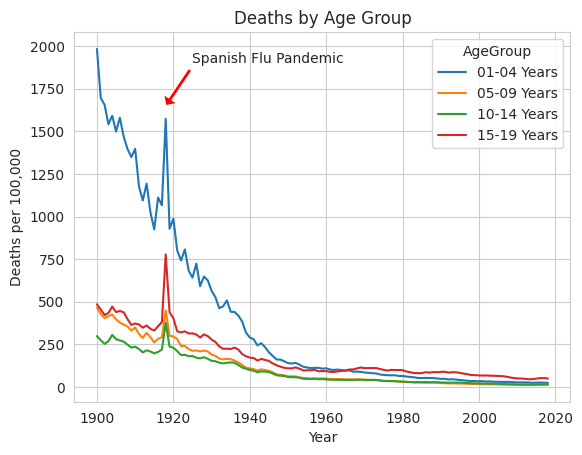

In [92]:
# annotate a plot
ax = sns.lineplot(data=mortality_data,
                  x='Year', y='DeathRate', hue='AgeGroup')
ax.set_title('Deaths by Age Group')
ax.set_ylabel('Deaths per 100,000')
ax.annotate(text='Spanish Flu Pandemic',
    xy=(1918, 1650), xytext=(1925, 1900),
    arrowprops=dict(facecolor='red', width=3, headwidth=12, headlength=6))

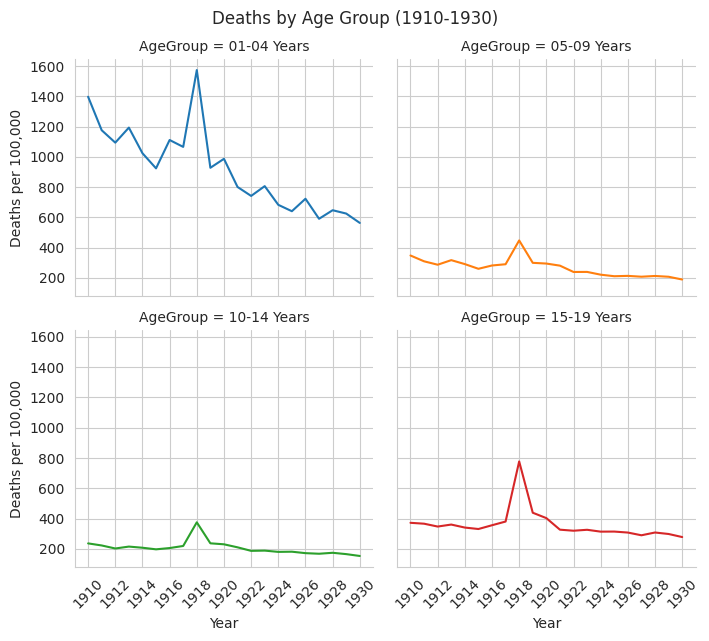

In [93]:
# axes methods for enhancing subplots
g = sns.relplot(
    data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', legend=False,
    col='AgeGroup', col_wrap=2, height=3, aspect=1.2)
g.fig.suptitle('Deaths by Age Group (1910-1930)', y=1.025)
for ax in g.axes.flat:
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xticks([x for x in range(1910, 1931, 2)])
    ax.tick_params('x', labelrotation=45)

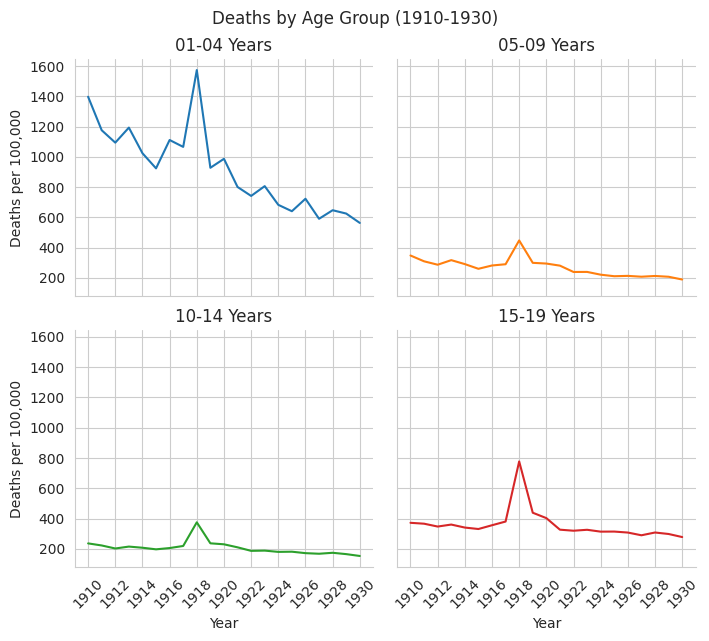

In [94]:
# Custom titles for subplots
g = sns.relplot(
    data=mortality_data.query('Year >= 1910 and Year <= 1930'),
    kind='line', x='Year', y='DeathRate', hue='AgeGroup', legend=False,
    col='AgeGroup', col_wrap=2, height=3, aspect=1.2)
g.fig.suptitle('Deaths by Age Group (1910-1930)', y=1.025)
ageGroups = mortality_data['AgeGroup'].drop_duplicates().tolist()
for index, ax in enumerate(g.axes.flat):
    ax.set_title(ageGroups[index])
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xticks([x for x in range(1910, 1931, 2)])
    ax.tick_params('x', labelrotation=45)             # label rotation

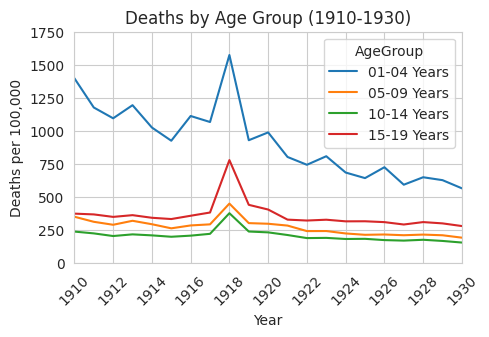

In [95]:
# Set the size for a specific plot
# import a Matplotlib module and set the figure size
# import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,3))

# create the line plot
sns.lineplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup')

# use the ax and fig objects to enhance and save the plot
ax.set(title='Deaths by Age Group (1910-1930)',
    ylabel='Deaths per 100,000',
    xticks=[x for x in range(1910, 1931, 2)],
    xlim=(1910,1930), ylim=(0,1750)),
ax.tick_params('x', labelrotation=45)
fig.savefig('deaths_by_age_group_line.png')